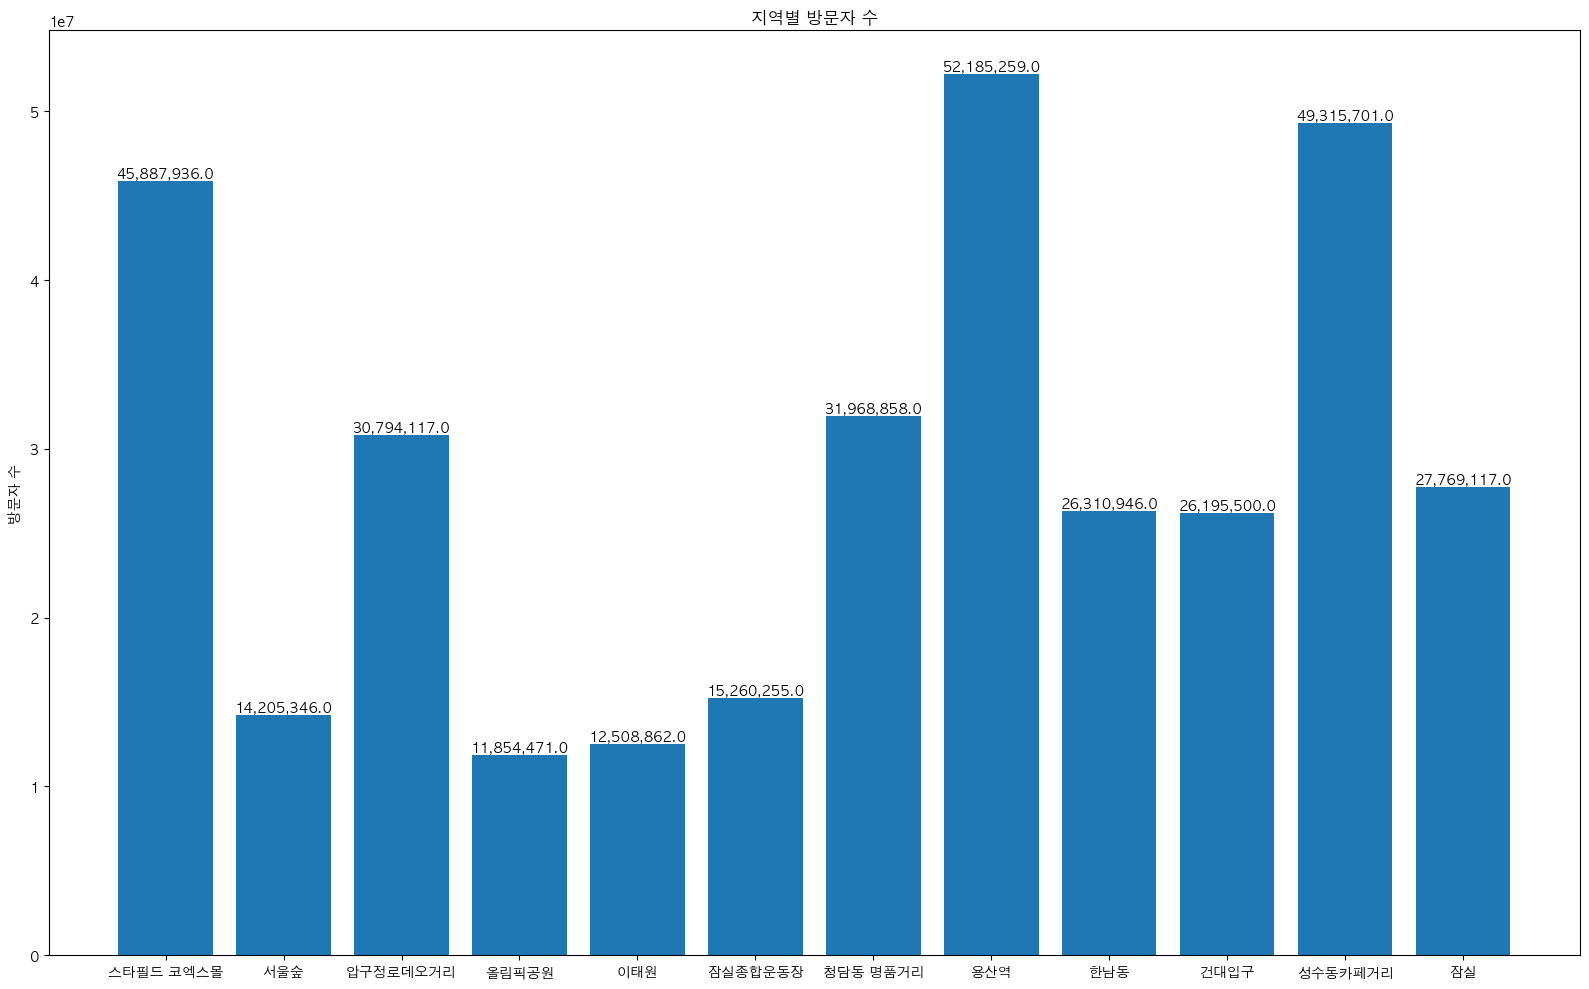

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_path = "/System/Library/Fonts/Supplemental/AppleGothic.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

file_path1 = '강남 방문자수.csv'
df1 = pd.read_csv(file_path1, encoding='cp949', low_memory=False)

file_path2 = '성수건대 방문자수.csv'
df2 = pd.read_csv(file_path2, encoding='cp949', low_memory=False)

file_path3 = '잠실 방문자수.csv'
df3 = pd.read_csv(file_path3, encoding='cp949', low_memory=False)

file_path4 = '용산구 방문자수.csv'
df4 = pd.read_csv(file_path4, encoding='cp949', low_memory=False)

total_df = pd.concat([df1, df2, df3, df4], ignore_index=True)
new_df = total_df.iloc[4::5, :]

new_df_grouped = new_df.groupby('지자체')['방문자수'].sum().reset_index()

# 성수1가2동, 성수2가1동, 성수2가3동의 인덱스 번호
indices_to_combine_sungsu = [2, 3, 4]
indices_to_combine_jamsil = [8, 9]

# 이미 '성수동카페거리' 행이 추가되었는지 여부 확인
already_combined_sungsu = new_df_grouped[new_df_grouped['지자체'] == '성수동카페거리'].shape[0] > 0
already_combined_jamsil = new_df_grouped[new_df_grouped['지자체'] == '잠실'].shape[0] > 0

# '성수동카페거리' 행이 추가되지 않은 경우에만 합치기 실행
if not already_combined_sungsu:
    # 성수1가2동, 성수2가1동, 성수2가3동의 방문자수 합계 계산
    combined_visitors_sungsu = new_df_grouped.loc[indices_to_combine_sungsu, '방문자수'].sum()

    # 새로운 행으로 '성수동카페거리' 추가
    new_row_sungsu = pd.DataFrame({'지자체': ['성수동카페거리'], '방문자수': [combined_visitors_sungsu]})
    new_df_grouped = pd.concat([new_df_grouped, new_row_sungsu], ignore_index=True)

# '롯데월드, 석촌호수 등' 행이 추가되지 않은 경우에만 합치기 실행
if not already_combined_jamsil:
    # 잠실3동과 잠실6동의 방문자수 합계 계산
    combined_visitors_jamsil = new_df_grouped.loc[indices_to_combine_jamsil, '방문자수'].sum()

    # 새로운 행으로 '롯데월드, 석촌호수 등' 추가
    new_row_jamsil = pd.DataFrame({'지자체': ['잠실'], '방문자수': [combined_visitors_jamsil]})
    new_df_grouped = pd.concat([new_df_grouped, new_row_jamsil], ignore_index=True)

# 새로운 데이터프레임 생성
hotplace_df = new_df_grouped.iloc[[0, 1, 5, 7, 8, 9, 12, 13, 14, 15, 16, 17]].copy()

# '지자체' 이름 변경
hotplace_df.loc[hotplace_df['지자체'] == '삼성1동', '지자체'] = '스타필드 코엑스몰'
hotplace_df.loc[hotplace_df['지자체'] == '성수1가1동', '지자체'] = '서울숲'
hotplace_df.loc[hotplace_df['지자체'] == '신사동', '지자체'] = '압구정로데오거리'
hotplace_df.loc[hotplace_df['지자체'] == '청담동', '지자체'] = '청담동 명품거리'
hotplace_df.loc[hotplace_df['지자체'] == '잠실2동', '지자체'] = '잠실종합운동장'
hotplace_df.loc[hotplace_df['지자체'] == '화양동', '지자체'] = '건대입구'
hotplace_df.loc[hotplace_df['지자체'] == '한강로동', '지자체'] = '용산역'
hotplace_df.loc[hotplace_df['지자체'] == '이태원1동', '지자체'] = '이태원'
hotplace_df.loc[hotplace_df['지자체'] == '오륜동', '지자체'] = '올림픽공원'

# 시각화
plt.figure(figsize=(16, 10))
bars = plt.bar(hotplace_df['지자체'], hotplace_df['방문자수'])
plt.title('지역별 방문자 수')
plt.ylabel('방문자 수')

# 각 막대 위에 수치 표시
for i, v in enumerate(hotplace_df['방문자수']):
    plt.text(i, v + 0.5, f"{v:,}", ha='center', va='bottom')

plt.tight_layout()
plt.show()